# Environment and file preparation
Source illustration: codes of cell 2 to 7 are from "Assignment2_example"(https://github.com/fedhere/PUI2018_fb55/blob/master/HW3_fb55/Assignment2_example.ipynb)

In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3

In [2]:
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata=os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
!curl https://data.cityofnewyork.us/api/views/j34j-vqvt/rows.csv?accessType=DOWNLOAD > FDNY.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  204k    0  204k    0     0   686k      0 --:--:-- --:--:-- --:--:--  687k


In [4]:
# move the data
!mv FDNY.csv $PUIDATA

In [5]:
#test if the data is there
!ls $PUIDATA

dhsdaily.csv  FDNY.csv


In [6]:
#read in the data with pandas
import pandas as pd
FDNY = pd.read_csv("%s/FDNY.csv"%os.getenv("PUIDATA"))

# Data Check_1st

In [7]:
#print the fist 7 lines out
FDNY.head(7)

,YEARMONTH,INCIDENTCLASSIFICATION,INCIDENTBOROUGH,INCIDENTCOUNT,AVERAGERESPONSETIME
0,2009/07,All Fire/Emergency Incidents,Citywide,40850,04:27
1,2009/07,All Fire/Emergency Incidents,Manhattan,10709,04:32
2,2009/07,All Fire/Emergency Incidents,Bronx,8137,04:37
3,2009/07,All Fire/Emergency Incidents,Staten Island,2205,04:45
4,2009/07,All Fire/Emergency Incidents,Brooklyn,11505,04:01
5,2009/07,All Fire/Emergency Incidents,Queens,8294,04:43
6,2009/07,False Alarm,Citywide,2655,04:07


# Data cleaning

In [8]:
#delete all but 2 columns:
FDNY_1=FDNY.drop(['YEARMONTH','INCIDENTCLASSIFICATION', 'INCIDENTBOROUGH'],axis=1)

In [9]:
FDNY_1

,INCIDENTCOUNT,AVERAGERESPONSETIME
0,40850,04:27
1,10709,04:32
2,8137,04:37
3,2205,04:45
4,11505,04:01
5,8294,04:43
6,2655,04:07
7,474,04:07
8,755,04:26
9,192,03:49


In [10]:
#delete last invalid 336 rows:
for i in range(336):
    FDNY_1=FDNY_1.drop(FDNY_1.index[[4032]])

    
#delete other invalid rows:
j=0
for i in range(4032):
    if i%42==0:
        j=j+1
    else:
        FDNY_1=FDNY_1.drop(FDNY_1.index[[j]])

In [11]:
#Conversion time format:
def ts(t):
    m,s = t.strip().split(":")
    return int(m) * 60 + int(s)

k=0
for i in range (96):
    k=(i)*42
    FDNY_1.AVERAGERESPONSETIME[k]=ts(FDNY_1.AVERAGERESPONSETIME[k])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Data Check_2st

In [12]:
#FDNY_1

# Data plot

Populating the interactive namespace from numpy and matplotlib


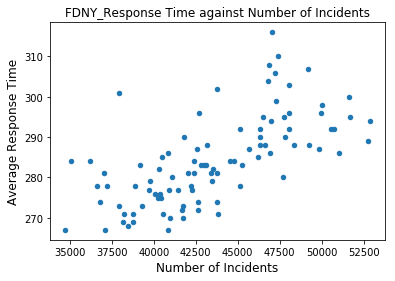

In [13]:
#scatter
%pylab inline
ax=FDNY_1.plot(x='INCIDENTCOUNT',y='AVERAGERESPONSETIME',kind='scatter')
ax.set_xlabel("Number of Incidents",fontsize=12)
ax.set_ylabel("Average Response Time",fontsize=12);
ax.set_title("FDNY_Response Time against Number of Incidents",fontsize=12);